<a href="https://colab.research.google.com/github/leo-lopes/Census-/blob/main/census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Census study

The objective of this simulation is find out the income of a person with the data given in the census.csv file. The plan follows:

* 1 - Clean and visualize the data 
* 2- Apply some ML techniques in the data
* 3- Conclusions 

In [2]:
# import libraries
# import bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

## Cleaning and visualizating the Data

In [4]:
df = pd.read_csv('census.csv')
df

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
df.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

Good news, I don't have any empty row or Nan in the data. Let's just take a look in the workclass column:

In [11]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

OK, at first glance I thoght it would to have to many categories of workclass and this may be bad in data sense, but it's not the case. Now, let's see how the numerical data is correlated with the income.

In [14]:
grafico = px.treemap(df,path=['workclass','age'])
grafico.show()

In [16]:
grafico = px.parallel_categories(df, dimensions=['education', 'income'])
grafico.show()

So, we conclude that people with a higher degree education have a bigger probability of having a income >50k. However, by now, I don't have any reason to discard a column of our table, so I'll keep them (Maybe the native-country, but not now). 

## Classification

Our mission in here is to find out if to classify the income of someone like > or < 50k. In order to do that, I'll apply some ML methods.

In [17]:
df.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [18]:
x_census=df.iloc[:,0:14].values #classifiers
y_census = df.iloc[:,14].values #class

We need to encoder the categorical variables

### LabelEncorder

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [21]:
x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_encoder_education.fit_transform(x_census[:,3])
x_census[:,5] = label_encoder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13])

### Scaling the classifiers

In [22]:
# we're going to use StandardScaler
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

### Split the data in train and test

In [30]:
from sklearn.model_selection import train_test_split
x_census_train, x_census_test, y_census_train, y_census_test = train_test_split(x_census, y_census, test_size = 0.15, random_state = 0)

OK, now we can go to classification.

# Naive_baynes - accuracy = 80%
Let's begin by the simpler algorithm

In [31]:
from sklearn.naive_bayes import GaussianNB
naive_census = GaussianNB()
naive_census.fit(x_census_train,y_census_train)
prediction=naive_census.predict(x_census_test)
prediction

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

Ok, we have some results, bu how good is that ?

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
accuracy_score(y_census_test,prediction)

0.8057318321392016

No that bad, 80% of accuracy for a simple algorithm is good. 

0.8057318321392016

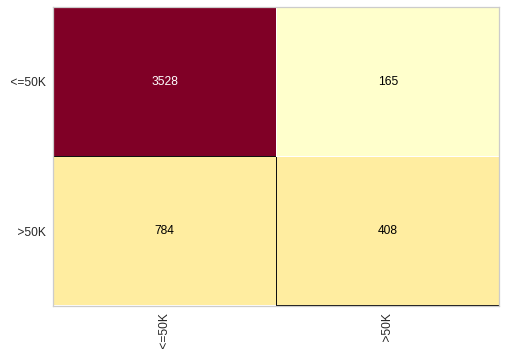

In [35]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_train,y_census_train)
cm.score(x_census_test,y_census_test)

We can do better, Let's try RandomForest.

### Random Forest - Accuracy = 85%

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
tree_census = RandomForestClassifier(criterion='entropy',random_state=0)
tree_census.fit(x_census_train,y_census_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [43]:
prediction_tree = tree_census.predict(x_census_test)
prediction_tree

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [44]:
accuracy_score(prediction_tree,y_census_test)

0.8528147389969294

It's better than Naive-Baynes, however we can try SVM and (if needed) we can go to NN.

### SVM - Accuracy = 84%

In [45]:
from sklearn.svm import SVC

In [46]:
svm_census = SVC(kernel='rbf',random_state=0,C=2.0)
svm_census.fit(x_census_train,y_census_train)

SVC(C=2.0, random_state=0)

In [47]:
prediction_svm = svm_census.predict(x_census_test)
prediction_svm

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [50]:
accuracy_score(y_census_test,prediction_svm)

0.8458546571136131

SVM doesn't solve our problem, so we need NN.

### Neural Networks

In [51]:
from sklearn.neural_network import MLPClassifier

In [53]:
NN_census = MLPClassifier(max_iter=500,verbose=True,tol=0.0001)
NN_census.fit(x_census_train,y_census_train)

Iteration 1, loss = 0.46296233
Iteration 2, loss = 0.36268747
Iteration 3, loss = 0.33955500
Iteration 4, loss = 0.32903325
Iteration 5, loss = 0.32536900
Iteration 6, loss = 0.32306592
Iteration 7, loss = 0.32175963
Iteration 8, loss = 0.32039803
Iteration 9, loss = 0.31966709
Iteration 10, loss = 0.31846962
Iteration 11, loss = 0.31801587
Iteration 12, loss = 0.31736796
Iteration 13, loss = 0.31684713
Iteration 14, loss = 0.31596757
Iteration 15, loss = 0.31560066
Iteration 16, loss = 0.31515394
Iteration 17, loss = 0.31457153
Iteration 18, loss = 0.31408577
Iteration 19, loss = 0.31381078
Iteration 20, loss = 0.31329769
Iteration 21, loss = 0.31271961
Iteration 22, loss = 0.31231129
Iteration 23, loss = 0.31162930
Iteration 24, loss = 0.31141903
Iteration 25, loss = 0.31100479
Iteration 26, loss = 0.31057498
Iteration 27, loss = 0.30998136
Iteration 28, loss = 0.30961749
Iteration 29, loss = 0.30921683
Iteration 30, loss = 0.30929747
Iteration 31, loss = 0.30855951
Iteration 32, los

MLPClassifier(max_iter=500, verbose=True)

In [56]:
predictions_NN = NN_census.predict(x_census_test)

In [57]:
accuracy_score(predictions_NN,y_census_test)

0.8403275332650972

# Conclusions

As we might see the ML algorithm that better fitted the data was RandomForest, with 85% of accuracy. 85% is a good value considering that we have a lot columns(15) and the data is not so uniform. However this simple program would allow to say the range of income of someone with 85% of precision, and it works reall great in the range lower than 50k, that is, the majority of the population.